In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
build_xs = lambda x: [x**4, x**3, x**2, x, np.ones_like(x)] 

In [3]:
def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

In [4]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

In [5]:
def main(x_train, y_train):
    """训练模型，并返回从x到y的映射。"""
    lr = LinearRegression()
    feature_train, label_train = np.vstack(build_xs(x_train)).T, y_train
    result = lr.fit(feature_train, label_train)
    print(result.coef_)
    def f(x):
        feature_test = np.vstack(build_xs(x)).T
        return result.predict(feature_test)

    return f

(300,)
(200,)
[ 9.61559370e-07 -3.54316564e-04  4.39437283e-02 -1.47352928e+00
  0.00000000e+00]
预测值与真实值的标准差：11.7


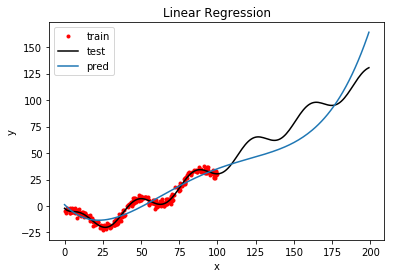

In [6]:
# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'

    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    # 计算预测的输出值
    y_test_pred = f(x_test)

    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    # 显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()